#### Import Libraries

In [1]:
import sys
sys.path.append('/Users/w5b0h0/Desktop/gradient normalization/gradient normalization')

import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from algorithms import QSGD, EF21, FedAvg
# from utils.util import create_fresh_models
from utils import Client, Server, create_fresh_models, plot_accuracy_comparison, plot_loss_comparison, plot_min_function_values
from model import LogisticRegressionBinary, MLP, ResNet, resnet18
from data import split_doubly_stochastic_direct, get_mnist_dataset, get_cifar10_dataset, get_mnist_binary_dataset
from torchvision import datasets, transforms

import random


#### Obtain Heterogeneous Data

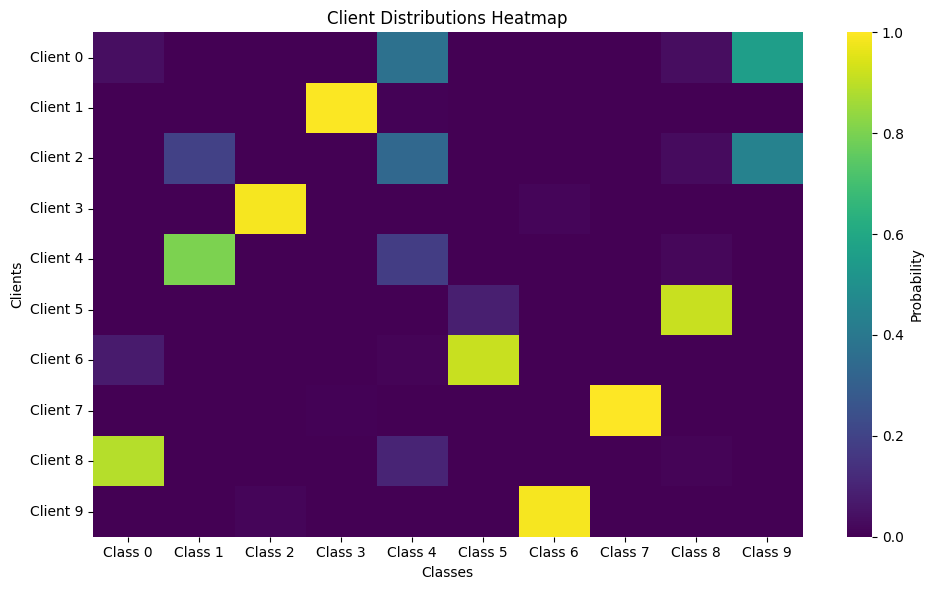

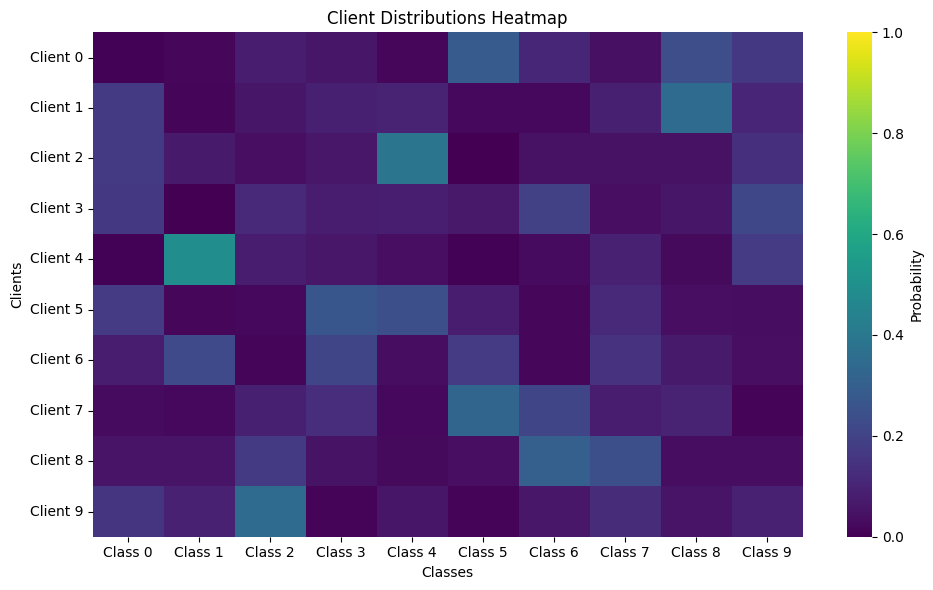

array([[0.0068596 , 0.0171115 , 0.07457097, 0.05627893, 0.01706255,
        0.2815607 , 0.1078001 , 0.04214289, 0.23498061, 0.16163218],
       [0.16640697, 0.01560969, 0.05595348, 0.08688312, 0.09535924,
        0.02074683, 0.02142975, 0.08684777, 0.34753367, 0.10322946],
       [0.16852961, 0.07015017, 0.0361364 , 0.0600675 , 0.38725713,
        0.00138893, 0.04655825, 0.04571026, 0.04547301, 0.1387288 ],
       [0.16201368, 0.00148205, 0.11218434, 0.07914473, 0.08417841,
        0.06261815, 0.19311611, 0.03683597, 0.05673355, 0.21169305],
       [0.00646215, 0.48474142, 0.08155432, 0.06108787, 0.03901942,
        0.00682493, 0.02993064, 0.09173354, 0.02420594, 0.17443974],
       [0.17526259, 0.01736807, 0.01987535, 0.26716882, 0.23949946,
        0.07995287, 0.01748165, 0.11216138, 0.0384796 , 0.03275018],
       [0.07803845, 0.22637528, 0.0140663 , 0.20492597, 0.03268245,
        0.1750868 , 0.0192658 , 0.14256273, 0.06822816, 0.03876797],
       [0.03047656, 0.02117612, 0.0891222

In [2]:
seed=26
random.seed(seed)
torch.manual_seed(seed)

train_dataset, test_dataset = get_cifar10_dataset()

num_clients = 10
num_classes = 10
alpha1 = 0.1
alpha2 = 10


dataset_list1, client_distribution1 = split_doubly_stochastic_direct(train_dataset,alpha1,num_clients,num_classes)
dataset_list2, client_distribution2 = split_doubly_stochastic_direct(train_dataset,alpha2,num_clients,num_classes)

batch_size = 128
inner_lr = 0.001

client_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
server_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True)

from utils import visualize_client_distributions

visualize_client_distributions(client_distribution1)

visualize_client_distributions(client_distribution2)

In [3]:
loss_results = {}
acc_results = {}
record_interval ={}

In [ ]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
inner_lr = 0.01
gamma = 0.03
compressor_type = "top_k"
K = 0.8
R = 1
algo_name = "QSGD-GN-M" # u=1 0.1
gamma_to_test=[0.5,0.2,0.1,0.05,0.02]

for gamma in gamma_to_test:
    print(gamma)

    clients, server = create_fresh_models("ResNet-18", dataset_list1, train_dataloader, test_dataloader, 
                R*batch_size, num_classes, inner_lr, client_device, server_device,algo_name,theta)

    algorithm = QSGD(clients, server, theta, algo_name, compressor_type, compressor_param=K, compress_round=R)
    loss, acc, grad_norm = algorithm.qsgd(iteration, criterion, gamma, inner_iter, lr_decay=False, record_interval=10)
    loss_results[f"{algo_name} u={1}"] = loss
    acc_results[f"{algo_name} u={1}"] = acc


In [7]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
inner_lr = 0.01
gamma = 0.03
compressor_type = "top_k"
K = 0.4
R = 2
algo_name = "QSGD-GN-M" # u=2 0.2
gamma_to_test=[0.2]

for gamma in gamma_to_test:
    print(gamma)

    clients, server = create_fresh_models("ResNet-18", dataset_list1, train_dataloader, test_dataloader, 
                R*batch_size, num_classes, inner_lr, client_device, server_device,algo_name,theta)

    algorithm = QSGD(clients, server, theta, algo_name, compressor_type, compressor_param=K, compress_round=R)
    loss, acc, grad_norm = algorithm.qsgd(iteration, criterion, gamma, inner_iter, lr_decay=False, record_interval=2)
    loss_results[f"{algo_name} u={2}"] = loss
    acc_results[f"{algo_name} u={2}"] = acc

0.2
QSGD-GN-M 0.0
Norm = 0.6105244159698486
QSGD-GN-M Round 0: Loss = 2.8791, Accuracy = 10.00%
Norm = 0.8649359941482544
QSGD-GN-M Round 2: Loss = 3.0896, Accuracy = 10.54%
Norm = 1.2116563320159912
QSGD-GN-M Round 4: Loss = 3.0430, Accuracy = 10.00%
Norm = 1.2029540538787842
QSGD-GN-M Round 6: Loss = 2.6949, Accuracy = 10.03%
Norm = 0.9783413410186768
QSGD-GN-M Round 8: Loss = 2.6783, Accuracy = 11.68%
Norm = 0.9854708313941956
QSGD-GN-M Round 10: Loss = 2.5369, Accuracy = 10.00%
Norm = 0.8366833329200745
QSGD-GN-M Round 12: Loss = 2.4806, Accuracy = 10.21%
Norm = 0.756878674030304
QSGD-GN-M Round 14: Loss = 2.4111, Accuracy = 17.29%
Norm = 0.7191412448883057
QSGD-GN-M Round 16: Loss = 2.4006, Accuracy = 10.00%
Norm = 0.6438852548599243
QSGD-GN-M Round 18: Loss = 2.3528, Accuracy = 11.59%
Norm = 0.5944750905036926
QSGD-GN-M Round 20: Loss = 2.2897, Accuracy = 18.34%
Norm = 0.5609056353569031
QSGD-GN-M Round 22: Loss = 2.3107, Accuracy = 11.32%
Norm = 0.5348049402236938
QSGD-GN-M Roun

In [8]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
inner_lr = 0.01
gamma = 0.03
compressor_type = "top_k"
K = 0.4
R = 1
algo_name = "QSGD" # u=1 0.2
gamma_to_test=[0.2]

for gamma in gamma_to_test:
    print(gamma)

    clients, server = create_fresh_models("ResNet-18", dataset_list1, train_dataloader, test_dataloader, 
                R*batch_size, num_classes, inner_lr, client_device, server_device,algo_name,theta)

    algorithm = QSGD(clients, server, theta, algo_name, compressor_type, compressor_param=K, compress_round=R)
    loss, acc, grad_norm = algorithm.qsgd(iteration, criterion, gamma, inner_iter, lr_decay=False, record_interval=2)
    loss_results[f"{algo_name} u={1}"] = loss
    acc_results[f"{algo_name} u={1}"] = acc

0.2


QSGD 0.0
Norm = 6.670174598693848
QSGD Round 0: Loss = 9.7555, Accuracy = 10.00%
Norm = 18.748985290527344
QSGD Round 2: Loss = 18.4007, Accuracy = 10.00%
Norm = 15.28584098815918
QSGD Round 4: Loss = 15.3777, Accuracy = 10.00%
Norm = 13.87513256072998
QSGD Round 6: Loss = 14.3029, Accuracy = 10.00%
Norm = 16.9401798248291
QSGD Round 8: Loss = 10.3376, Accuracy = 10.00%
Norm = 14.094952583312988
QSGD Round 10: Loss = 12.1849, Accuracy = 9.30%
Norm = 9.811920166015625
QSGD Round 12: Loss = 11.9349, Accuracy = 10.00%
Norm = 12.210269927978516
QSGD Round 14: Loss = 7.4637, Accuracy = 10.00%
Norm = 5.998208522796631
QSGD Round 16: Loss = 5.4446, Accuracy = 10.00%
Norm = 3.549982786178589
QSGD Round 18: Loss = 3.5667, Accuracy = 10.00%
Norm = 7.678995132446289
QSGD Round 20: Loss = 4.7713, Accuracy = 9.18%
Norm = 2.250394821166992
QSGD Round 22: Loss = 2.9149, Accuracy = 9.42%
Norm = 1.8031550645828247
QSGD Round 24: Loss = 2.4062, Accuracy = 11.97%
Norm = 1.2124122381210327
QSGD Round 26: 

In [ ]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
inner_lr = 0.01
gamma = 0.03
compressor_type = "top_k"
K = 0.6
R = 1
algo_name = "EF21-SGDM" # 0.2
gamma_to_test=[0.2]

for gamma in gamma_to_test:
    print(gamma)

    clients, server = create_fresh_models("ResNet-18", dataset_list1, train_dataloader, test_dataloader, 
                R*batch_size, num_classes, inner_lr, client_device, server_device,algo_name,theta)

    algorithm = EF21(clients, server, theta, algo_name, compressor_type, compressor_param=K, compress_round=1)
    loss, acc = algorithm.ef21(iteration, criterion, gamma, inner_iter, record_interval=2, lr_decay=False)
    loss_results[f"{algo_name}"] = loss
    acc_results[f"{algo_name}"] = acc

0.2
EF21-SGDM 0.0
EF21-SGDM Round 0: Loss = 2.5250, Accuracy = 10.02%
EF21-SGDM Round 2: Loss = 2.4363, Accuracy = 10.19%
EF21-SGDM Round 4: Loss = 2.8384, Accuracy = 10.00%
EF21-SGDM Round 6: Loss = 2.8319, Accuracy = 12.16%
EF21-SGDM Round 8: Loss = 2.8525, Accuracy = 10.00%
EF21-SGDM Round 10: Loss = 2.4636, Accuracy = 11.42%
EF21-SGDM Round 12: Loss = 2.6423, Accuracy = 10.00%
EF21-SGDM Round 14: Loss = 2.4575, Accuracy = 10.01%
EF21-SGDM Round 16: Loss = 2.4927, Accuracy = 14.90%
EF21-SGDM Round 18: Loss = 2.2577, Accuracy = 17.97%
EF21-SGDM Round 20: Loss = 2.3888, Accuracy = 10.00%
EF21-SGDM Round 22: Loss = 2.2326, Accuracy = 18.88%
EF21-SGDM Round 24: Loss = 2.2988, Accuracy = 20.82%
EF21-SGDM Round 26: Loss = 2.1509, Accuracy = 21.18%
EF21-SGDM Round 28: Loss = 2.2050, Accuracy = 14.91%
EF21-SGDM Round 30: Loss = 2.0943, Accuracy = 25.49%
EF21-SGDM Round 32: Loss = 2.1109, Accuracy = 22.85%
EF21-SGDM Round 34: Loss = 2.0842, Accuracy = 24.15%
EF21-SGDM Round 36: Loss = 2.0387

#### Experimental Algorithm and Parameter Settings

In [3]:
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 1
inner_lr = 0.01
gamma = 0.03
compressor_type = "top_k"
K = 0.4
R = 2
algorithms_to_test = ["QSGD-GN-M","QSGD","EF21-SGDM"]

loss_results = {}
acc_results = {}
record_interval ={}

for algo_name in algorithms_to_test:

    for r in range(1,R+1):
        if r>1 and algo_name in ["QSGD","EF21-SGDM","EF21-SGD"]:
            break

        if algo_name in ["QSGD","QSGD-GN","QSGD-M","QSGD-GN-M"]:
            clients, server = create_fresh_models("ResNet-18", dataset_list1, train_dataloader, test_dataloader, 
                                            r*batch_size, num_classes, inner_lr, client_device, server_device,algo_name,theta)
        else:
            clients, server = create_fresh_models("ResNet-18", dataset_list1, train_dataloader, test_dataloader, 
                                            batch_size, num_classes, inner_lr, client_device, server_device,algo_name,theta)
        

        # print(clients[1].dataloader)
        if algo_name in ["EF21-SGD", "EF21-SGDM"]:
            algorithm = EF21(clients, server, theta, algo_name, compressor_type, compressor_param=K, compress_round=1)
            loss, acc = algorithm.ef21(iteration, criterion, gamma, inner_iter, record_interval=2, lr_decay=False)
        elif algo_name in ["QSGD","QSGD-GN","QSGD-M","QSGD-GN-M"]:
            algorithm = QSGD(clients, server, theta, algo_name, compressor_type, compressor_param=K, compress_round=r)
            loss, acc, grad_norm = algorithm.qsgd(iteration, criterion, gamma, inner_iter, lr_decay=False, record_interval=R-r+1)


        if algo_name in ["QSGD","QSGD-GN","QSGD-M","QSGD-GN-M"]:
            loss_results[f"{algo_name} u={r}"] = loss
            acc_results[f"{algo_name} u={r}"] = acc
            record_interval[f"{algo_name} u={r}"] = r
        else:
            loss_results[algo_name] = loss
            acc_results[algo_name] = acc
            record_interval[algo_name] = 1

QSGD-GN-M 0.0
Norm = 0.6670175194740295
QSGD-GN-M Round 0: Loss = 2.3283, Accuracy = 10.05%
Norm = 0.9214403629302979
QSGD-GN-M Round 2: Loss = 2.3443, Accuracy = 9.74%
Norm = 0.9592259526252747
QSGD-GN-M Round 4: Loss = 2.3711, Accuracy = 10.09%
Norm = 1.3531185388565063
QSGD-GN-M Round 6: Loss = 2.3146, Accuracy = 10.54%
Norm = 1.5546700954437256
QSGD-GN-M Round 8: Loss = 2.3038, Accuracy = 12.22%
Norm = 1.6139403581619263
QSGD-GN-M Round 10: Loss = 2.3203, Accuracy = 10.13%
Norm = 1.7704073190689087
QSGD-GN-M Round 12: Loss = 2.3044, Accuracy = 10.32%
Norm = 1.912480354309082
QSGD-GN-M Round 14: Loss = 2.2924, Accuracy = 12.49%
Norm = 1.9657310247421265
QSGD-GN-M Round 16: Loss = 2.2943, Accuracy = 11.09%
Norm = 2.01884126663208
QSGD-GN-M Round 18: Loss = 2.2936, Accuracy = 12.85%
Norm = 2.0810840129852295
QSGD-GN-M Round 20: Loss = 2.2867, Accuracy = 13.77%
Norm = 2.1342532634735107
QSGD-GN-M Round 22: Loss = 2.2803, Accuracy = 16.06%
Norm = 2.1610403060913086
QSGD-GN-M Round 24: L

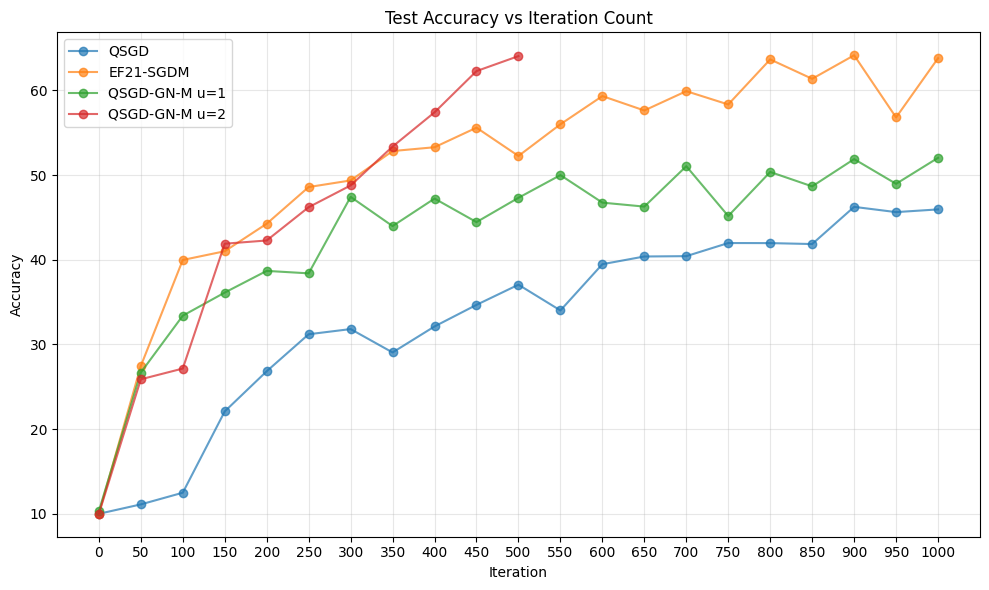

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
figsize=(10, 6)
title='Test Accuracy vs Iteration Count'
acc_results

plt.figure(figsize=figsize)
interval = 25

x = np.arange(0,len(acc_results["EF21-SGDM"])*2,2*interval)

# plt.plot(x, acc_results["QSGD u=1"][::interval], '-o', label="QSGD", alpha=0.7)
plt.plot(x, acc_results["EF21-SGDM"][::interval], '-o', label="EF21-SGDM", alpha=0.7)
plt.plot(x, acc_results["QSGD-GN-M u=1"][::interval], '-o', label="QSGD-GN-M u=1", alpha=0.7)
# plt.plot(np.arange(0,len(acc_results["EF21-SGDM"]),2*interval), acc_results["QSGD-GN-M u=2"][::interval], '-o', label="QSGD-GN-M u=2", alpha=0.7)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()